In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

figdir = '/Users/spbishop/Projects/NASA/Scale_Dependence/fig/'

In [2]:
# Atmosphere & Ocean Constants
depth = 50.                          # m
alpha   = 23.9e-7                    # s-1
beta    = 23.9e-7/(20.*depth/50.)    # s-1.
gamma_o = (1.9/2.)*1.e-8             # s-1
sf_forcing_a = 2.e-5  
cp    = 4218.                        # J/(kg K)
rho0  = 1000.                        # kg m-3# s-1 
sf = cp*rho0*depth                   # K -> W m-2

In [3]:
gamma_o

9.499999999999999e-09

In [8]:
# Atmosphere Damping
# gamma_a = 2.e-6; txt = 'high'                      # s-1 (Bishop et al. 2017)
# gamma_a = 2.e-7; txt = 'low'                      # s-1
# gamma_a = 6.e-7                      # s-1
gamma_a = np.array([2.e-6, 2.e-7])
gamma_a

array([2.e-06, 2.e-07])

In [9]:
# Variable Surface Ocean Forcing
exponent = np.arange(-9.5, -4.1, 0.1)
sf_forcing_o = 10**(exponent)
sf_forcing_o

array([3.16227766e-10, 3.98107171e-10, 5.01187234e-10, 6.30957344e-10,
       7.94328235e-10, 1.00000000e-09, 1.25892541e-09, 1.58489319e-09,
       1.99526231e-09, 2.51188643e-09, 3.16227766e-09, 3.98107171e-09,
       5.01187234e-09, 6.30957344e-09, 7.94328235e-09, 1.00000000e-08,
       1.25892541e-08, 1.58489319e-08, 1.99526231e-08, 2.51188643e-08,
       3.16227766e-08, 3.98107171e-08, 5.01187234e-08, 6.30957344e-08,
       7.94328235e-08, 1.00000000e-07, 1.25892541e-07, 1.58489319e-07,
       1.99526231e-07, 2.51188643e-07, 3.16227766e-07, 3.98107171e-07,
       5.01187234e-07, 6.30957344e-07, 7.94328235e-07, 1.00000000e-06,
       1.25892541e-06, 1.58489319e-06, 1.99526231e-06, 2.51188643e-06,
       3.16227766e-06, 3.98107171e-06, 5.01187234e-06, 6.30957344e-06,
       7.94328235e-06, 1.00000000e-05, 1.25892541e-05, 1.58489319e-05,
       1.99526231e-05, 2.51188643e-05, 3.16227766e-05, 3.98107171e-05,
       5.01187234e-05, 6.30957344e-05])

In [10]:
ntime = 60000+1 # needs to be divisible by 30 for monthly means
time = np.arange(0, ntime)
na = np.random.normal(size=ntime)
no = np.random.normal(size=ntime)

In [12]:
# Preallocation of ocean and atmosphere temperature
t = np.nan*np.zeros((ntime-1, ))
ta = np.zeros((ntime-1, sf_forcing_o.size, gamma_a.size))
to = np.zeros((ntime-1, sf_forcing_o.size, gamma_a.size))

In [14]:
# Forward Difference Daily
dt = 86400.  # seconds in a day

for k in range(gamma_a.size):
    for m in range(sf_forcing_o.size):
        for n in range(1, ntime-1):
            dta = alpha*(to[n-1, m, k] - ta[n-1, m, k]) + sf_forcing_a*na[n-1] - gamma_a[k]*ta[n-1, m, k]
            ta[n, m, k] =  dta*dt + ta[n-1, m, k]
            dto = beta*(ta[n-1, m, k] - to[n-1, m, k]) + sf_forcing_o[m]*no[n-1] - gamma_o*to[n-1, m, k]
            to[n, m, k] = dto*dt + to[n-1, m, k]

for n in range(0, ntime-1):
    t[n] = 0.5*(time[n] + time[n+1])

In [19]:
# 30-Day Average
mtime = int((ntime-1)/30)
tm = np.nan*np.ones((mtime, ))
ta_m = np.nan*np.ones((mtime, sf_forcing_o.size, gamma_a.size))
to_m = np.nan*np.ones((mtime, sf_forcing_o.size, gamma_a.size))
k = 0
for n in range(0, ntime-1, 30):
    tm[k] = np.mean(t[n:n+30])
    to_m[k, :, :] = np.mean(to[n:n+30, :, :], axis=0)
    ta_m[k, :, :] = np.mean(ta[n:n+30, :, :], axis=0)
    k += 1

In [24]:
# SST Tendency Monthly (central difference)
x = to_m
mtime, mforce, mgamma = x.shape
xt = np.nan*np.ones((mtime-2, mforce, mgamma))
tm_tend = tm[1:-1]
dt = 2*(30*86400)  # seconds
for n in range(mtime-2):
    xt[n, :, :] = (x[n+2, :, :] - x[n, :, :]) / dt
    
to_tend = xt*sf
thf = sf*beta*(to_m - ta_m)  # Sign convention positive out of the ocean
thf.shape

(2000, 54, 2)

In [ ]:
# plt.plot(tm_tend, to_tend)

In [ ]:
plt.plot(tm, thf)

In [25]:
THF = np.mean(thf, axis=0)
THF

array([[2.31988228e-02, 7.59805248e-02],
       [2.32553067e-02, 7.60133292e-02],
       [2.33264157e-02, 7.60546276e-02],
       [2.34159366e-02, 7.61066191e-02],
       [2.35286367e-02, 7.61720726e-02],
       [2.36705178e-02, 7.62544737e-02],
       [2.38491355e-02, 7.63582105e-02],
       [2.40740018e-02, 7.64888074e-02],
       [2.43570918e-02, 7.66532191e-02],
       [2.47134809e-02, 7.68602012e-02],
       [2.51621483e-02, 7.71207763e-02],
       [2.57269870e-02, 7.74488208e-02],
       [2.64380768e-02, 7.78618044e-02],
       [2.73332859e-02, 7.83817200e-02],
       [2.84602873e-02, 7.90362549e-02],
       [2.98790980e-02, 7.98602656e-02],
       [3.16652749e-02, 8.08976335e-02],
       [3.39139383e-02, 8.22036024e-02],
       [3.67448379e-02, 8.38477198e-02],
       [4.03087293e-02, 8.59175410e-02],
       [4.47954027e-02, 8.85232915e-02],
       [5.04437899e-02, 9.18037370e-02],
       [5.75546881e-02, 9.59335732e-02],
       [6.65067786e-02, 1.01132729e-01],
       [7.777679

In [26]:
Tm = np.mean(to_m, axis=0)
Tm

array([[-5.54674962e-03, -3.70618095e-02],
       [-5.54183062e-03, -3.70449533e-02],
       [-5.53563797e-03, -3.70237326e-02],
       [-5.52784188e-03, -3.69970174e-02],
       [-5.51802718e-03, -3.69633849e-02],
       [-5.50567121e-03, -3.69210441e-02],
       [-5.49011596e-03, -3.68677402e-02],
       [-5.47053307e-03, -3.68006346e-02],
       [-5.44587966e-03, -3.67161537e-02],
       [-5.41484287e-03, -3.66097984e-02],
       [-5.37576986e-03, -3.64759051e-02],
       [-5.32657985e-03, -3.63073434e-02],
       [-5.26465330e-03, -3.60951368e-02],
       [-5.18669239e-03, -3.58279845e-02],
       [-5.08854542e-03, -3.54916597e-02],
       [-4.96498571e-03, -3.50682518e-02],
       [-4.80943324e-03, -3.45352129e-02],
       [-4.61360430e-03, -3.38641567e-02],
       [-4.36707026e-03, -3.30193470e-02],
       [-4.05670229e-03, -3.19557946e-02],
       [-3.66597217e-03, -3.06168614e-02],
       [-3.17407209e-03, -2.89312444e-02],
       [-2.55480658e-03, -2.68091783e-02],
       [-1.

In [29]:
# Lagged Correlation
x = to_m - Tm
xt = to_tend
y = thf - THF
nx = 24  # Months
lags = np.arange(-nx, nx + 1)
r_QT = np.nan*np.ones((mforce, lags.size, mgamma))
r_QTt = np.nan*np.ones((mforce, lags.size, mgamma))

for k in range(mgamma):
    for m in range(mforce):
        for n in range(lags.size):
            xprime = np.roll(x[:, m, k], -lags[n])
            yprime = np.roll(xt[:, m, k], -lags[n])
            R = np.corrcoef(xprime, y[:, m, k])
            r_QT[m, n, k] = R[0, 1]
            R = np.corrcoef(yprime, y[1:-1, m, k])
            r_QTt[m, n, k] = R[0, 1]

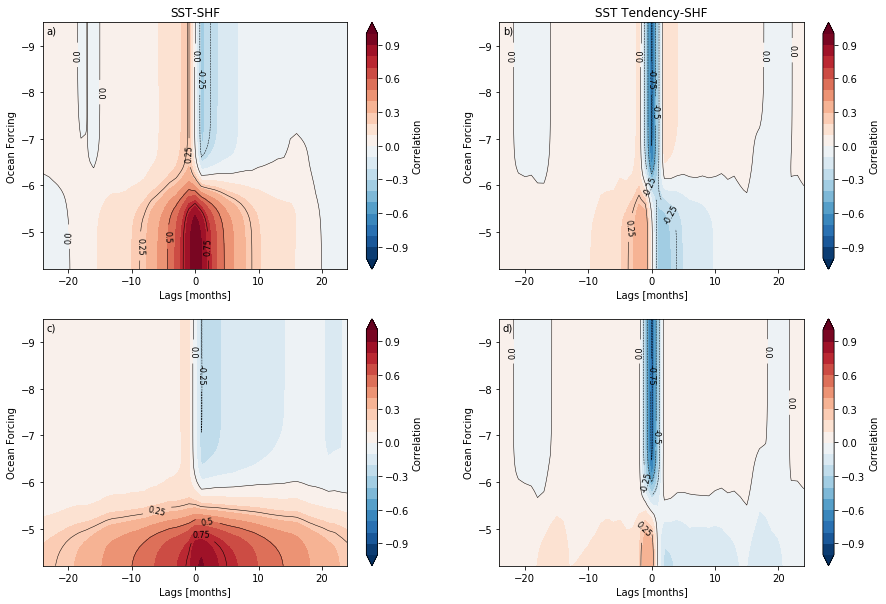

In [58]:
# Figures
plt.rcParams['figure.figsize'] = 15, 10

fmt = r'%r'
fntsize = 8
cmap = cm.RdBu_r
ci = 0.1; ci2 = 0.25
clim = 1
clev = np.arange(-clim, clim+ci, ci)
clev2 = np.arange(-clim, clim+ci2, ci2)

n = 0
plt.subplot(2, 2, n+1)
plt.contourf(lags, np.log10(sf_forcing_o), r_QT[:, :, n], levels=clev, extend='both', cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Correlation')
cs1 = plt.contour(lags, np.log10(sf_forcing_o), r_QT[:, :, n], levels=clev2, colors='k', linewidths=0.5)
plt.clabel(cs1, fmt=fmt, fontsize=fntsize)
plt.xlabel('Lags [months]')
plt.ylabel('Ocean Forcing')
# plt.title('SST-SHF, $\gamma_a = ' + str(gamma_a[n]) + '$')
plt.title('SST-SHF')
plt.gca().invert_yaxis()
plt.text(-23.5, -9.25, 'a)')

plt.subplot(2, 2, n+2)
plt.contourf(lags, np.log10(sf_forcing_o), r_QTt[:, :, n], levels=clev, extend='both', cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Correlation')
cs2 = plt.contour(lags, np.log10(sf_forcing_o), r_QTt[:, :, n], levels=clev2, colors='k', linewidths=0.5)
plt.clabel(cs2, fmt=fmt, fontsize=fntsize)
plt.xlabel('Lags [months]')
plt.ylabel('Ocean Forcing')
plt.title('SST Tendency-SHF')
plt.gca().invert_yaxis()
plt.text(-23.5, -9.25, 'b)')

n = 1
plt.subplot(2, 2, n+2)
plt.contourf(lags, np.log10(sf_forcing_o), r_QT[:, :, n], levels=clev, extend='both', cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Correlation')
cs1 = plt.contour(lags, np.log10(sf_forcing_o), r_QT[:, :, n], levels=clev2, colors='k', linewidths=0.5)
plt.clabel(cs1, fmt=fmt, fontsize=fntsize)
plt.xlabel('Lags [months]')
plt.ylabel('Ocean Forcing')
# plt.title('SST-SHF, $\gamma_a = ' + str(gamma_a[n]) + '$')
plt.gca().invert_yaxis()
plt.text(-23.5, -9.25, 'c)')

plt.subplot(2, 2, n+3)
plt.contourf(lags, np.log10(sf_forcing_o), r_QTt[:, :, n], levels=clev, extend='both', cmap=cmap)
cbar = plt.colorbar()
cbar.set_label('Correlation')
cs2 = plt.contour(lags, np.log10(sf_forcing_o), r_QTt[:, :, n], levels=clev2, colors='k', linewidths=0.5)
plt.clabel(cs2, fmt=fmt, fontsize=fntsize)
plt.xlabel('Lags [months]')
plt.ylabel('Ocean Forcing')
# plt.title('SSTtend-SHF, $\gamma_a = ' + str(gamma_a[n]) + '$')
plt.gca().invert_yaxis()
plt.text(-23.5, -9.25, 'd)')

plt.savefig(figdir + 'stochastic_fig_corrrigendum.pdf', bbox_inches='tight')